In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [2]:
cred = credentials.Certificate("C:/Users/kipr/Downloads/surf-16cf2-firebase-adminsdk-l3b7y-a9b657bdb9.json")
firebase_admin.initialize_app(cred, {
  'projectId': 'surf-16cf2',
})

db = firestore.client()

In [13]:
examples = []
labels = []

users_ref = db.collection(u'dataset')
docs = users_ref.stream()

for doc in docs:
    current = doc.to_dict()
    examples.append(current['data'])
    labels.append([1, 0] if current['label'] == '0' else [0, 1])

In [19]:
examples = np.array(examples)
labels = np.array(labels)

In [39]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(100, 'relu'),
                             tf.keras.layers.Dense(2)])

loss_fn = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [40]:
model.fit(examples, labels, epochs=10, batch_size=32)

Epoch 1/10
14/14 [==============================] - 0s 855us/step - loss: 1.7610 - accuracy: 0.6429
Epoch 2/10
14/14 [==============================] - 0s 712us/step - loss: 0.5920 - accuracy: 0.8795
Epoch 3/10
14/14 [==============================] - 0s 784us/step - loss: 0.3899 - accuracy: 0.9040
Epoch 4/10
14/14 [==============================] - 0s 855us/step - loss: 0.3258 - accuracy: 0.9129
Epoch 5/10
14/14 [==============================] - 0s 784us/step - loss: 0.2727 - accuracy: 0.9487
Epoch 6/10
14/14 [==============================] - 0s 784us/step - loss: 0.2653 - accuracy: 0.9353
Epoch 7/10
14/14 [==============================] - 0s 783us/step - loss: 0.2134 - accuracy: 0.9554
Epoch 8/10
14/14 [==============================] - 0s 712us/step - loss: 0.1755 - accuracy: 0.9621
Epoch 9/10
14/14 [==============================] - 0s 784us/step - loss: 0.1655 - accuracy: 0.9665
Epoch 10/10
14/14 [==============================] - 0s 784us/step - loss: 0.1735 - accuracy: 0.9665

Actual label: 0
Predicted label: [[ 2.1367118 -0.9827288]]


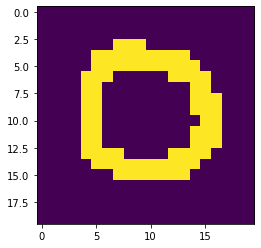

In [123]:
n = np.random.randint(len(labels))
ex = examples[n]

plt.imshow(ex.reshape(20, 20))
print(f"Actual label: {labels[n][1]}")
prediction = model.predict(ex[np.newaxis ,...])
print(f"Predicted label: {prediction}")

In [126]:

import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, "C:/Users/kipr/Downloads/")

C:\Users\kipr\AppData\Roaming\Python\Python38\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
